In [24]:
from asyncore import read
import pandas as pd
from konlpy.tag import Okt
from tqdm import tqdm

df = pd.read_csv("./news_beforeD_2.csv")

okt = Okt() 
noun_list = []
for content in tqdm(df['title']): 
    nouns = okt.nouns(content) # 명사만
    # print(nouns)
    noun_list.append(nouns)

100%|██████████| 54101/54101 [02:27<00:00, 367.42it/s]


In [25]:
df['nouns'] = noun_list
# df.head()

In [26]:
drop_index_list = [] # 지워버릴 index를 담는 리스트
for i, row in df.iterrows():
    temp_nouns = row['nouns']
    if len(temp_nouns) == 0: # 만약 명사리스트가 비어 있다면
        drop_index_list.append(i) # 지울 index 추가
        
df = df.drop(drop_index_list) 

# index 재지정
df.index = range(len(df))

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 문서 리스트로 치환 (tfidfVectorizer 인풋 형태를 맞추기 위해)
text = [" ".join(noun) for noun in df['nouns']]

tfidf_vectorizer = TfidfVectorizer(min_df = 5, ngram_range=(1,5))
tfidf_vectorizer.fit(text)
vector = tfidf_vectorizer.transform(text).toarray()

In [28]:
from sklearn.cluster import DBSCAN
import numpy as np

vector = np.array(vector) # Normalizer를 이용해 변환된 벡터
model = DBSCAN(eps=0.35,min_samples=3, metric = "cosine")
result = model.fit_predict(vector)


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


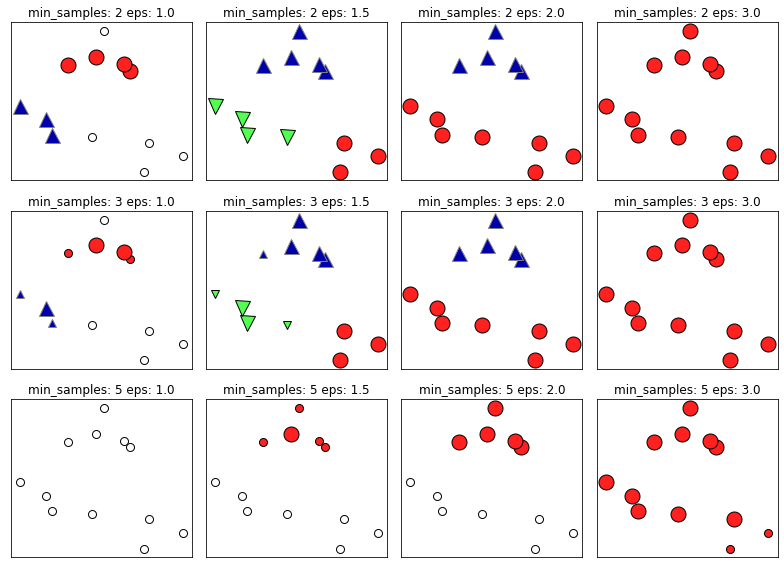

In [29]:
import mglearn

mglearn.plots.plot_dbscan()

In [30]:
df['result'] = result
df.head()

,title,originallink,link,description,pubDate,nouns,result
0,"우리은행, AI기반 업무시스템 고도화에 총력 [기획/ 2022년 5대은행 <b>IT...",https://www.ddaily.co.kr/news/article.html?no=...,https://n.news.naver.com/mnews/article/138/000...,함께 ▲‘<b>마이데이터</b>’ 시스템 고도화 ▲영업점업무 프로세스의 개선을 위한...,"Tue, 02 Aug 2022 13:33:00 +0900","[우리은행, 기반, 업무, 시스템, 고도화, 총력, 기획, 은행, 전략]",-1
1,[핀테크핫이슈] <b>금융</b>권 &apos;<b>디지털</b> 유니버셜 <b>금...,http://www.digitaltoday.co.kr/news/articleView...,http://www.digitaltoday.co.kr/news/articleView...,<b>금융</b>권이 플랫폼을 통해 다양한 <b>금융</b>·비<b>금융</b> 서...,"Tue, 02 Aug 2022 07:32:00 +0900","[핀, 테크, 핫이슈, 금융, 권, 디지털, 유니버셜, 금융, 화두, 부상]",0
2,신창재 교보생명 회장 &quot;고객 중심 <b>디지털</b> 혁신 가속화 하라&q...,http://moneys.mt.co.kr/news/mwView.php?no=2022...,https://n.news.naver.com/mnews/article/417/000...,"플랫폼기획팀, <b>금융마이데이터</b>팀, 오픈이노베이션팀과 <b>디지털</b> ...","Tue, 02 Aug 2022 06:21:00 +0900","[창재, 교보, 생명, 회장, 고객, 중심, 디지털, 혁신, 가속, 하라]",475
3,[인슈어테크 기업 WIDE 인터뷰]“보험시장 정보 비대칭 개선으로 보험인식 높...,http://www.insnews.co.kr/design_php/news_view....,http://www.insnews.co.kr/design_php/news_view....,선도 ‘<b>마이</b>리얼플랜’과 ‘보닥’ 서비스로 보험업무 <b>디지털</b> ...,"Mon, 01 Aug 2022 01:16:00 +0900","[인슈, 테크, 기업, 인터뷰, 보험, 시장, 정보, 비, 대칭, 개선, 보험, 인식]",-1
4,"박승오 대표, 미얀마·인니 기반 동남아 추가 진출 모색 [엔데믹 시대, <b>금융<...",http://www.fntimes.com/html/view.php?ud=202207...,http://www.fntimes.com/html/view.php?ud=202207...,하나 <b>마이</b>크로파이낸스는 ‘제로(Zero)<b>디지털</b>환경’에서 <...,"Mon, 01 Aug 2022 00:02:00 +0900","[박승, 오, 대표, 미얀마, 인니, 기반, 동남아, 추가, 진출, 모색, 엔데믹,...",-1


In [31]:
for cluster_num in set(result):
    # -1,0은 노이즈 판별이 났거나 클러스터링이 안된 경우
    if(cluster_num == -1 or cluster_num == 0): 
        continue
    else:
        print("cluster num : {}".format(cluster_num))
        temp_df = df[df['result'] == cluster_num] # cluster num 별로 조회
        for title in temp_df['title']:
            print(title)
        print()

cluster num : 1
[<b>IT</b>와 결합한 <b>금융</b>]② 카드사 &apos;앱&apos;의 진화…기능+흥미 다 잡는다
[<b>IT</b>와 결합한 <b>금융</b>]② 카드사 &apos;앱&apos;의 진화…기능+흥미 다 잡는다
[<b>IT</b>와 결합한 <b>금융</b>]② 카드사 &apos;앱&apos;의 진화…기능+흥미 다 잡는다

cluster num : 2
[<b>IT</b>와 결합한 <b>금융</b>]① 은행권, <b>금융</b>업권 밖으로 &apos;Go&apos;
[<b>IT</b>와 결합한 <b>금융</b>]① 은행권, <b>금융</b>업권 밖으로 &apos;Go&apos;
[IT와 결합한 <b>금융</b>]① 은행권, <b>금융</b>업권 밖으로 &apos;Go&apos;
[IT와 결합한 <b>금융</b>]① 은행권, <b>금융</b>업권 밖으로 &apos;Go&apos;

cluster num : 3
광주은행, 상반기 당기순이익 1,229억원 달성
광주은행, 상반기 당기순이익 1,229억원 달성
광주은행, 상반기 당기순이익 1229억원 달성
광주은행, 상반기 당기순이익 1,229억원 달성
광주<b>은행</b>, 상반기 당기순이익 1,229억원 달성
광주<b>은행</b>, 상반기 당기순이익 1,229억원 달성
광주<b>은행</b>, 상반기 당기순이익 1229억원 달성
광주<b>은행</b>, 상반기 당기순이익 1,229억원 달성

cluster num : 4
지역 경제 버팀목 광주은행, 1분기 역대 최대 622억 순익
지역 경제 버팀목 광주은행, 1분기 역대 최대 622억 순익
지역 경제 버팀목 광주<b>은행</b>, 1분기 역대 최대 622억 순익

cluster num : 5
클라우드 기반 <b>금융</b> ‘차세대 코어뱅킹’ 혁신 주도…주목받는 뱅크웨어글로벌
클라우드 기반 <b>금융</b> ‘차세대 코어뱅킹’ 혁신 주도…주목받는 뱅크웨어글로벌
클라우드 기반 <b>금융</b> ‘차세대 코어뱅킹’ 혁신 주도…주목받는 뱅

In [32]:
df.to_csv(f'result_data_2.csv', encoding='utf-8-sig', index=False)

In [ ]:
# 중복 데이터 제거
# 기준 : 1. 네이버뉴스 2. 오래된순

